In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import pandas_datareader.data as web
import yfinance as yf

In [3]:
import yfinance as yf

# Set your date range
start = '2012-01-01'
end = '2022-12-31'

# Download data directly using yfinance
df = yf.download('AAPL', start=start, end=end)

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Show the first 5 rows
print(df.head())


C:\Users\Asus\AppData\Local\Temp\ipykernel_20612\3023273793.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Date                                                             
2012-01-03  12.359181  12.397351  12.292161  12.304183  302220800
2012-01-04  12.425602  12.462870  12.300577  12.322216  260022000
2012-01-05  12.563554  12.579182  12.402463  12.470987  271269600
2012-01-06  12.694889  12.705408  12.599317  12.615847  318292800
2012-01-09  12.674754  12.855681  12.663333  12.788059  394024400


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2022-12-23,130.173798,130.726634,127.982185,129.245816,63814900
2022-12-27,128.367188,129.729545,127.073942,129.699930,69007800
2022-12-28,124.428215,129.354401,124.260391,128.011792,85438400
2022-12-29,127.952568,128.811438,126.096612,126.353282,75703700
2022-12-30,128.268463,128.288212,125.800440,126.767912,77034200


In [5]:
print(df.isnull().sum())


Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [6]:
print(df.dtypes)


Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


In [7]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
0,2012-01-03,12.359181,12.397351,12.292161,12.304183,302220800
1,2012-01-04,12.425602,12.462870,12.300577,12.322216,260022000
2,2012-01-05,12.563554,12.579182,12.402463,12.470987,271269600
3,2012-01-06,12.694889,12.705408,12.599317,12.615847,318292800
4,2012-01-09,12.674754,12.855681,12.663333,12.788059,394024400


In [8]:
print(df.columns)


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [9]:
df = df.drop(['Date','Volume'],axis = 1)
df.head()

Price,Close,High,Low,Open
0,12.359181,12.397351,12.292161,12.304183
1,12.425602,12.462870,12.300577,12.322216
2,12.563554,12.579182,12.402463,12.470987
3,12.694889,12.705408,12.599317,12.615847
4,12.674754,12.855681,12.663333,12.788059


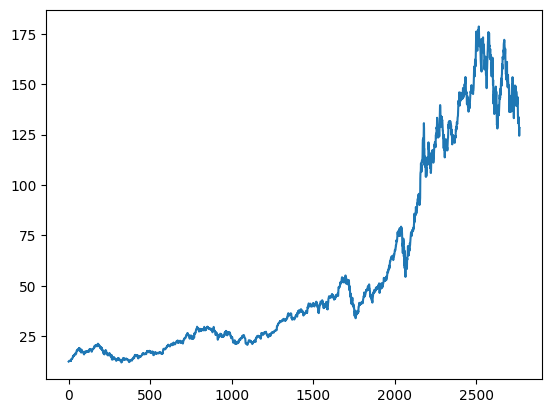

In [10]:
plt.plot(df.Close)

In [11]:
df

Price,Close,High,Low,Open
0,12.359181,12.397351,12.292161,12.304183
1,12.425602,12.462870,12.300577,12.322216
2,12.563554,12.579182,12.402463,12.470987
3,12.694889,12.705408,12.599317,12.615847
4,12.674754,12.855681,12.663333,12.788059
...,...,...,...,...
2763,130.173798,130.726634,127.982185,129.245816
2764,128.367188,129.729545,127.073942,129.699930
2765,124.428215,129.354401,124.260391,128.011792
2766,127.952568,128.811438,126.096612,126.353282


In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    148.424347
2764    148.076100
2765    147.690730
2766    147.345335
2767    147.002606
Name: Close, Length: 2768, dtype: float64

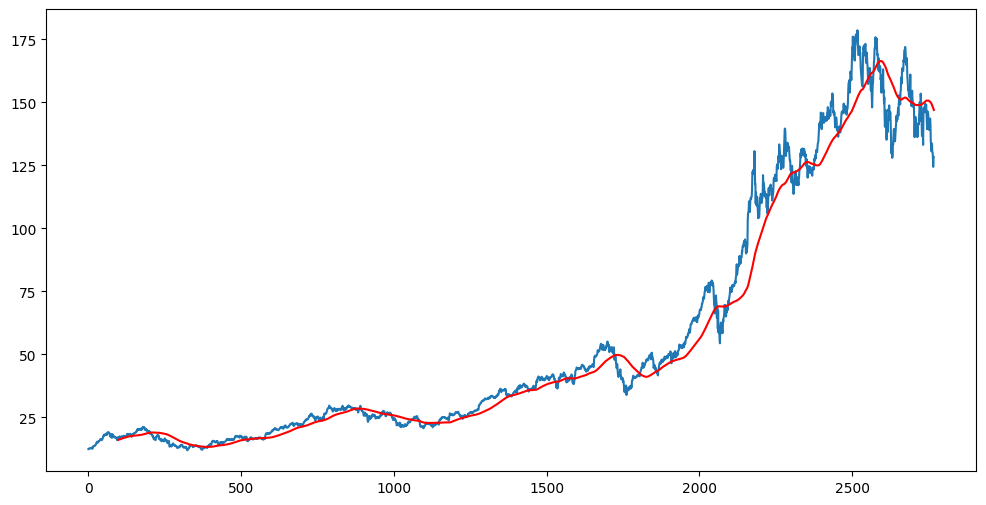

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    149.826821
2764    149.708340
2765    149.590360
2766    149.468037
2767    149.325181
Name: Close, Length: 2768, dtype: float64

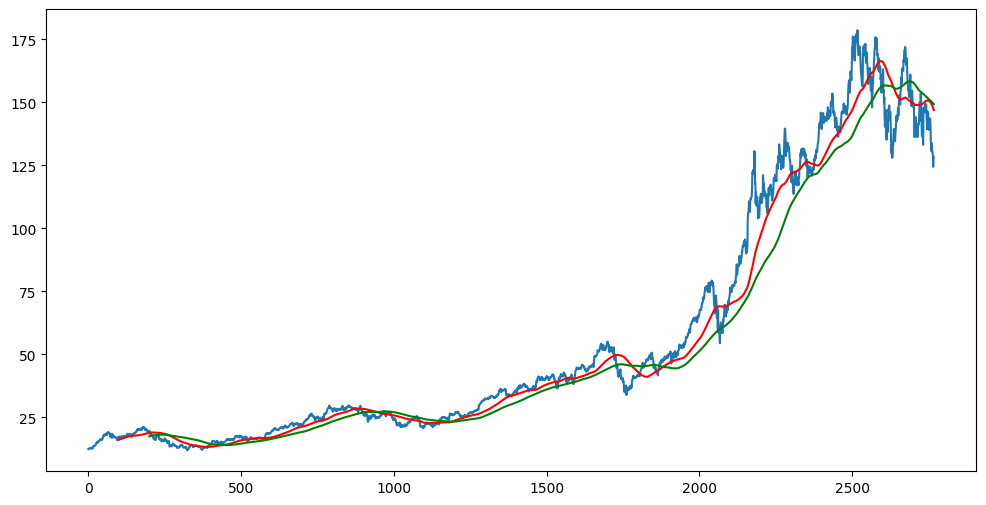

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [16]:
df.shape

(2768, 4)

# splitting Data into Training and Testing

In [17]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])
print(data_training.shape,data_testing.shape)

(1937, 1) (831, 1)


In [18]:
data_training.head()

,Close
0,12.359181
1,12.425602
2,12.563554
3,12.694889
4,12.674754


In [19]:
data_testing.head()

,Close
1937,53.009892
1938,53.202740
1939,53.701740
1940,53.265415
1941,52.486786


In [20]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scalar.fit_transform(data_training)
data_training_array

array([[0.01039586],
       [0.01193414],
       [0.01512906],
       ...,
       [0.97245432],
       [0.96966326],
       [0.94543298]])

In [22]:
x_train = [] #first 100 days will be this
y_train = [] #101 day will be this

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [23]:
x_train = np.array(x_train)

In [24]:
y_train = np.array(y_train)
y_train

array([0.11554055, 0.1224869 , 0.1272898 , ..., 0.97245432, 0.96966326,
       0.94543298])

In [25]:
x_train.shape

(1837, 100, 1)

# ML Model

In [26]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences = True ,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu' ))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 239ms/step - loss: 0.0771
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 244ms/step - loss: 0.0096
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 235ms/step - loss: 0.0088
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 246ms/step - loss: 0.0072
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 239ms/step - loss: 0.0064
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 245ms/step - loss: 0.0059
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 281ms/step - loss: 0.0062
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 249ms/step - loss: 0.0048
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 250ms/step - loss: 0.0056
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 247ms/step - loss: 0.0051


In [30]:
model.save('keras_model.h5')

In [31]:
data_testing.head()

,Close
1937,53.009892
1938,53.202740
1939,53.701740
1940,53.265415
1941,52.486786


In [32]:
data_training.tail(100)

,Close
1837,49.558876
1838,49.109127
1839,48.874672
1840,48.948833
1841,48.006268
...,...
1932,51.628601
1933,52.238491
1934,53.899406
1935,53.778893


In [33]:
past_100_days = data_training.tail(100)

In [34]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [35]:
final_df.head()

,Close
0,49.558876
1,49.109127
2,48.874672
3,48.948833
4,48.006268


In [36]:
input_data = scalar.fit_transform(final_df)

In [37]:
input_data.shape

(931, 1)

In [38]:
x_test = []
y_test = []

In [39]:
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [40]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


# making Prediction


In [41]:
y_predicted = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step


In [42]:
y_test

array([0.08313444, 0.08454181, 0.08818342, 0.08499921, 0.07931692,
       0.08105858, 0.07922889, 0.08512237, 0.08311682, 0.08123452,
       0.09029456, 0.09138524, 0.08148081, 0.08475294, 0.09564262,
       0.09573059, 0.091051  , 0.09567778, 0.10106105, 0.11182765,
       0.11122947, 0.11026187, 0.10859059, 0.11019147, 0.1121795 ,
       0.11939238, 0.11842475, 0.12408939, 0.1247931 , 0.13007089,
       0.13441624, 0.12428298, 0.1242302 , 0.13390601, 0.14632627,
       0.14928176, 0.14863083, 0.14882428, 0.15404729, 0.15530018,
       0.158935  , 0.15851151, 0.16294041, 0.15971148, 0.16521674,
       0.16758116, 0.16615196, 0.16068186, 0.15859984, 0.15819392,
       0.16629299, 0.16262285, 0.16888686, 0.16784585, 0.16239343,
       0.15408264, 0.15812338, 0.1648991 , 0.17395104, 0.16726351,
       0.17001617, 0.17405688, 0.17527456, 0.18178558, 0.1900964 ,
       0.19106698, 0.18988471, 0.19037869, 0.18935527, 0.19740156,
       0.19787799, 0.2078298 , 0.20763576, 0.21067054, 0.21442

In [43]:
y_predicted.shape

(831, 1)

In [44]:
scalar.scale_

array([0.00729781])

In [45]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

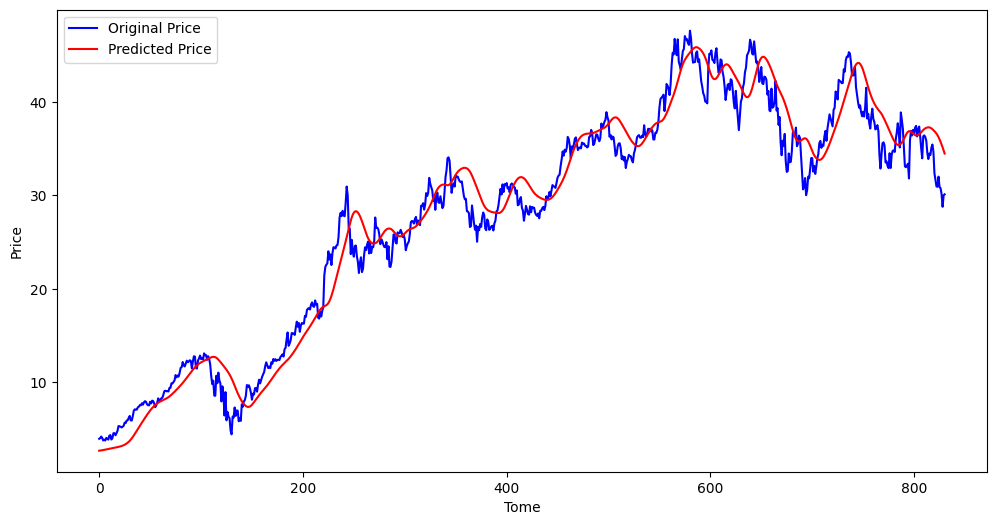

In [46]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted , 'r' , label = 'Predicted Price')
plt.xlabel('Tome')
plt.ylabel('Price')
plt.legend()

In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])  # Assumes df['Close'] is your column


In [48]:
# Save trained model
model.save('keras_model.h5')

# Save scaler
import joblib
joblib.dump(scaler, 'scaler.save')

# Save last 100 values for forecasting
np.save('last_100.npy', scaled_data[-100:])
